# Feature Scaling
## Normalization
Normalization is the process of scaling data to a fixed range, typically 0 to 1, to ensure that all features contribute equally to the model. It’s useful when features have different ranges and you want to maintain relative proportions.

The gole of normalization is to change the values of numerica columns in the dataset to use a common scale, without distroing difference in the range of values or losing information.

type:
1. MinMaxScaling
2. Mean Normalization
3. Max absulate scaling
4. Robust Scaling


MinMaxScalling - intution
**Min-Max Scaling** is a normalization technique that transforms data into a specified range, usually between 0 and 1. It scales the data based on the minimum and maximum values of each feature.

Formula:

                      Xi=(Xi-Xmin)/(Xmax-Xmin)


This ensures that all features are within the same range and helps improve the performance of algorithms sensitive to scale, like neural networks and KNN.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']

In [11]:
df

,Class label,Alcohol,Malic acid
0,class_label,alcohol,malic_acid
1,1,14.23,1.71
2,1,13.2,1.78
3,1,13.16,2.36
4,1,14.37,1.95
...,...,...,...
174,3,13.71,5.65
175,3,13.4,3.91
176,3,13.27,4.28
177,3,13.17,2.59


In [14]:
print(df['Alcohol'].dtype)

object


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Alcohol'] = le.fit_transform(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Density'>

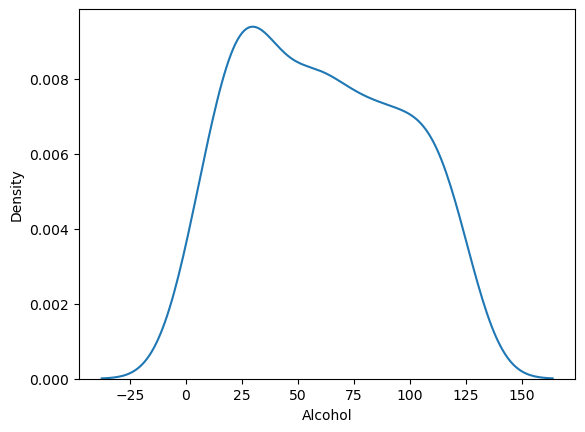

In [17]:
sns.kdeplot(df['Alcohol'])


<Axes: xlabel='Malic acid', ylabel='Density'>

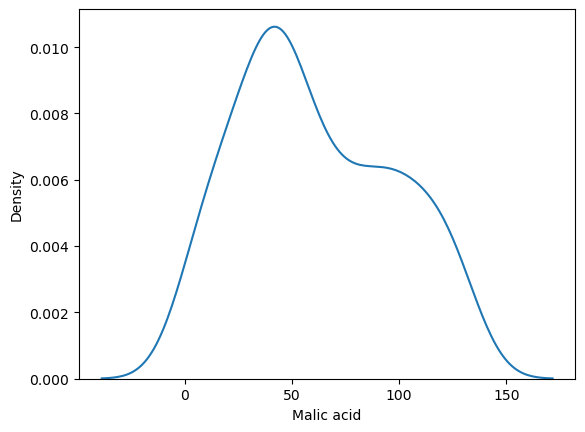

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Malic acid'] = le.fit_transform(df['Malic acid'])
sns.kdeplot(df['Malic acid'])

In [31]:
color_dict = {'class_label': 'red', '1': 'blue', '2': 'green'}

sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['class_label'], palette=color_dict)




KeyError: 'class_label'

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((125, 2), (54, 2))

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [35]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,125.0,125.0
mean,61.5,59.4
std,36.9,36.9
min,0.0,0.0
25%,29.0,30.0
50%,59.0,51.0
75%,94.0,90.0
max,126.0,133.0


In [36]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,125.0,125.0
mean,0.5,0.4
std,0.3,0.3
min,0.0,0.0
25%,0.2,0.2
50%,0.5,0.4
75%,0.7,0.7
max,1.0,1.0


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 40     1
126    2
22     1
74     2
83     2
      ..
103    2
67     2
117    2
47     1
172    3
Name: Class label, Length: 125, dtype: object

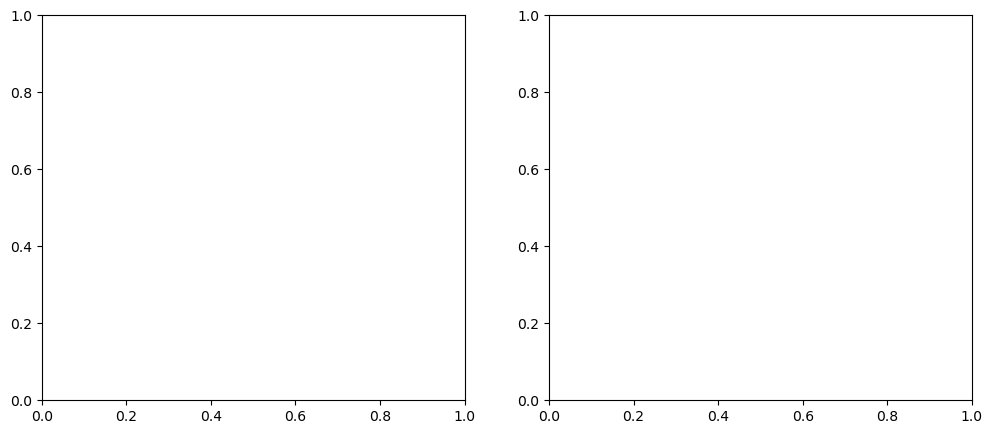

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()  